# Experiment 2: Effect of Multicollinearity on Linear Regression

## Research Question
How does multicollinearity affect the stability of linear regression coefficients, and how do regularization methods such as Ridge and Lasso mitigate this issue?

In this experiment, we study a regression setting where input features are highly correlated and analyze how different models behave in terms of coefficient values and prediction error.


In [1]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../results/exp2_results.csv")
df.head()


,model,alpha,coef_1,coef_2,mse
0,Linear,0.000000,3.348857,-0.122768,1.121390
1,Ridge,0.001000,3.345006,-0.118902,1.121390
2,Lasso,0.001000,3.226623,-0.000000,1.121524
3,Ridge,0.001833,3.341811,-0.115695,1.121390
4,Lasso,0.001833,3.225603,0.000000,1.121527


### Why Coefficient Analysis Matters

When features are highly correlated, linear regression can produce unstable coefficient estimates.  
Even small perturbations in the data can lead to large changes in coefficient values, despite similar prediction error.

We first examine how coefficient magnitudes change across models and regularization strengths.


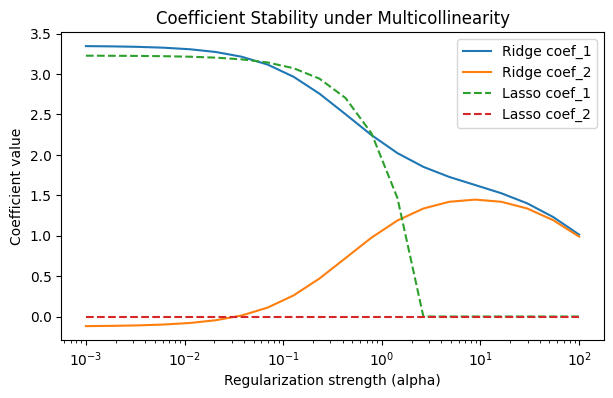

In [7]:
ridge = df[df["model"] == "Ridge"]
lasso = df[df["model"] == "Lasso"]
linear = df[df["model"] == "Linear"]

plt.figure(figsize=(7,4))

plt.plot(ridge["alpha"], ridge["coef_1"], label="Ridge coef_1")
plt.plot(ridge["alpha"], ridge["coef_2"], label="Ridge coef_2")

plt.plot(lasso["alpha"], lasso["coef_1"], "--", label="Lasso coef_1")
plt.plot(lasso["alpha"], lasso["coef_2"], "--", label="Lasso coef_2")

plt.xscale("log")
plt.xlabel("Regularization strength (alpha)")
plt.ylabel("Coefficient value")
plt.title("Coefficient Stability under Multicollinearity")
plt.savefig("../plots/exp2_coefficients.png", dpi=300, bbox_inches="tight")
plt.legend()
plt.show()


### Interpretation: Coefficient Stability

In the presence of multicollinearity, linear regression produces unstable coefficient values, as the model cannot uniquely attribute importance between correlated features.

Ridge regression stabilizes coefficients by shrinking them jointly, reducing variance without forcing sparsity.  
Lasso regression, in contrast, drives one of the correlated coefficients toward zero, effectively selecting a single feature.

This demonstrates how regularization addresses multicollinearity through different mechanisms.


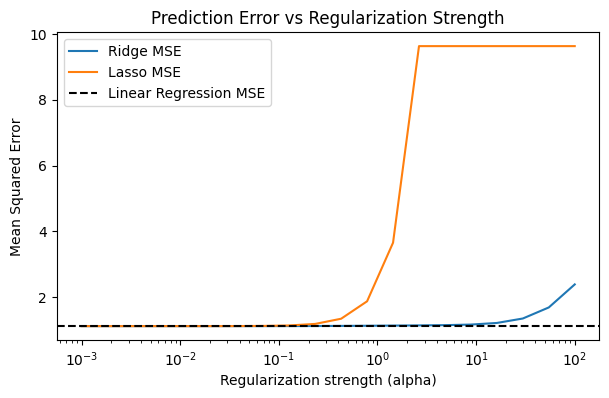

In [6]:
plt.figure(figsize=(7,4))

plt.plot(ridge["alpha"], ridge["mse"], label="Ridge MSE")
plt.plot(lasso["alpha"], lasso["mse"], label="Lasso MSE")

plt.axhline(
    linear["mse"].values[0],
    color="black",
    linestyle="--",
    label="Linear Regression MSE"
)

plt.xscale("log")
plt.xlabel("Regularization strength (alpha)")
plt.ylabel("Mean Squared Error")
plt.title("Prediction Error vs Regularization Strength")
plt.savefig("../plots/exp2_error_vs_alpha.png", dpi=300, bbox_inches="tight")
plt.legend()
plt.show()


### Interpretation: Prediction Error

Despite large differences in coefficient values, linear regression and regularized models often achieve similar prediction error on training data.

This highlights an important insight: multicollinearity primarily affects **interpretability and stability**, rather than raw predictive performance.

Regularization improves robustness without necessarily reducing training error.


### Theoretical Insight

Multicollinearity makes the matrix \(X^TX\) ill-conditioned, which amplifies numerical noise when computing the normal equation.

Regularization improves conditioning by adding a penalty term, making the optimization problem more stable.


### Key Takeaway

Multicollinearity leads to unstable and unreliable coefficient estimates in linear regression.  
Ridge regression stabilizes coefficients through shrinkage, while Lasso enforces sparsity by selecting among correlated features.

This experiment shows that understanding model behavior requires examining internal parameters, not just prediction error.
